In [582]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [583]:
df = pd.read_csv('customer_data_balanced.csv')
print(df.shape)
print(df.isnull().sum())

(2000, 6)
Age                     0
Tenure                  0
MonthlySpending_KRW     0
ContractType            0
CustomerServiceCalls    0
IsChurn                 0
dtype: int64


In [584]:
df = pd.get_dummies(df, columns=['ContractType'])

In [585]:
X = df.drop(columns=['IsChurn'])
y = df['IsChurn']

In [586]:
scaler = StandardScaler()


In [587]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [588]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [589]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [590]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [591]:

class_weight = {0: 1.0, 1: 1.5}
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70, batch_size=16, class_weight=class_weight)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4302 - loss: 0.8637 - val_accuracy: 0.6800 - val_loss: 0.6753
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 0.8169 - val_accuracy: 0.6900 - val_loss: 0.6596
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5811 - loss: 0.8149 - val_accuracy: 0.6650 - val_loss: 0.6379
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 0.7963 - val_accuracy: 0.6950 - val_loss: 0.6293
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.7863 - val_accuracy: 0.6950 - val_loss: 0.6187
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.7870 - val_accuracy: 0.7000 - val_loss: 0.6097
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.7828 - val_accuracy: 0.7050 - val_loss: 0.5991
Epoch 8/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7887 - val_accuracy: 0.

In [592]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {test_loss:.4f}, Test Accuracy : {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7518 - loss: 0.5856 
Test Loss : 0.6092, Test Accuracy : 0.7500


In [593]:
predict = model.predict(X_test)
predicted_classes = (predict>0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [594]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       132
           1       0.75      0.40      0.52        68

    accuracy                           0.75       200
   macro avg       0.75      0.66      0.68       200
weighted avg       0.75      0.75      0.73       200



In [595]:
accuracy = accuracy_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
conf = confusion_matrix(y_test, predicted_classes)

In [596]:
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix :")
print(conf)

Accuracy : 0.7500
F1 Score : 0.5192
Confusion Matrix :
[[123   9]
 [ 41  27]]


C:\Users\20170\AppData\Local\Temp\ipykernel_25308\551274910.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\20170\AppData\Local\Temp\ipykernel_25308\551274910.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\20170\Desktop\SK_Shield_Python\Tensor_proj\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\20170\Desktop\SK_Shield_Python\Tensor_proj\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


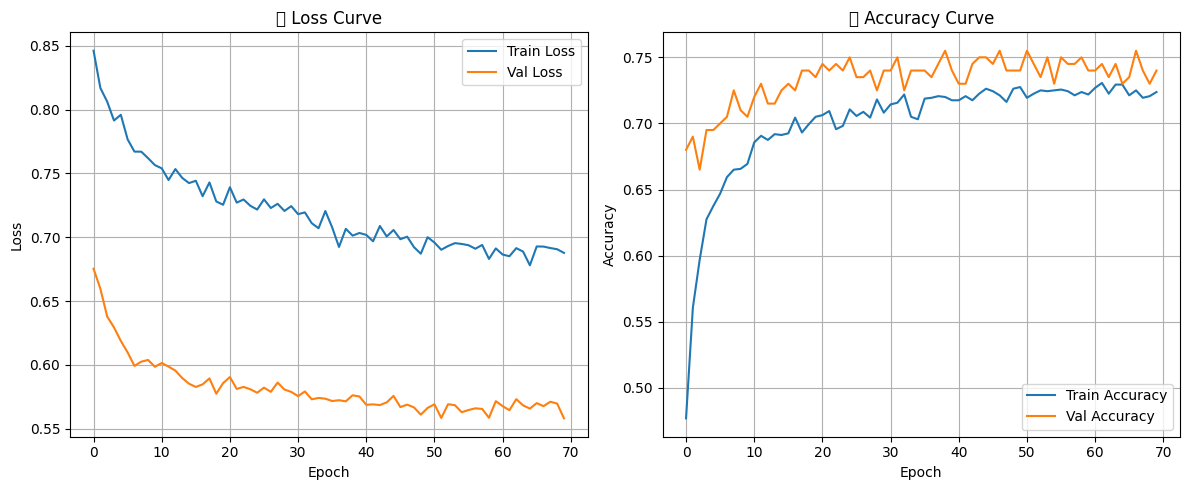

In [597]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# 1. Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()